In [1]:
import numpy as np

galaxy = open('SDSSDATA.txt',"r")

#read each line separately in the data file
lines=galaxy.readlines()
print(lines[0:20])


# split data up 

redshift=[]
umag = []
rmag = []
classification = []

for x in lines:
    redshift.append(x.split('\t')[2])
    umag.append(x.split('\t')[4])
    rmag.append(x.split('\t')[6])
    classification.append(x.split('\t')[9])


# convert to numpy arrays
redshift = np.array(redshift).astype(np.float)
umag = np.array(umag).astype(np.float)
rmag = np.array(rmag).astype(np.float)
classification = np.array(classification).astype(np.float)

galaxy.close()


FileNotFoundError: [Errno 2] No such file or directory: 'SDSSDATA.txt'

In [40]:
# find redshifts in range 0.07 to 0.15 (gives position in array)
selectionz = np.where(np.logical_and(redshift>= 0.07, redshift<= 0.15))

redshift1 = redshift[selectionz[0]]
umag1 = umag[selectionz[0]]
rmag1 = rmag[selectionz[0]]
classification1 = classification[selectionz[0]]

#find u & r magnitudes that are realistic, there are some that are extremely small values? range: -2000 to 2000
selectionu = np.where(np.logical_and(umag1>= -30, umag1<= 2000))
selectionr = np.where(np.logical_and(rmag1>= -30, rmag1<= 2000))

redshiftu = redshift1[selectionu[0]]
umagu = umag1[selectionu[0]]
classificationu = classification1[selectionu[0]]

redshiftr = redshift1[selectionr[0]]
rmagr = rmag1[selectionr[0]]
classificationr = classification1[selectionr[0]]

#find which classifications are ellipticals (class = 1) and which are spiral (class = 2)
ellipticalu = np.where(np.logical_and(classificationu>= 1, classificationu<= 1))
spiralu = np.where(np.logical_and(classificationu>= 2, classificationu<= 2))

ellipticalr = np.where(np.logical_and(classificationr>= 1, classificationr<= 1))
spiralr = np.where(np.logical_and(classificationr>= 2, classificationr<= 2))


#for u band separating both spirals and ellipticals
umag_ue = umagu[ellipticalu[0]]
umag_us = umagu[spiralu[0]]
redshift_ue = redshiftu[ellipticalu[0]]
redshift_us = redshiftu[spiralu[0]]

#for r band separating both spirals and ellipticals
rmag_re = rmagr[ellipticalr[0]]
rmag_rs = rmagr[spiralr[0]]
redshift_re = redshiftr[ellipticalr[0]]
redshift_rs = redshiftr[spiralr[0]]

#question 1: n_elliptical/n_spherical
(len(umag_ue))/(len(umag_us))



5.60215165531937

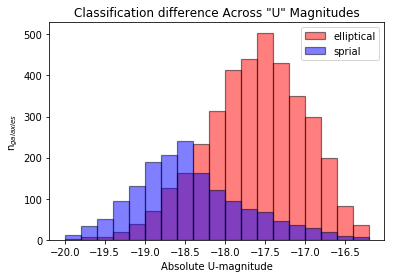

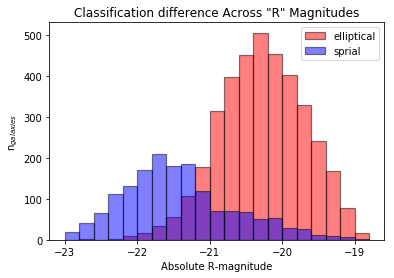

In [31]:
from matplotlib import pyplot as plt
bins = np.arange(-20,-16,.2)
plt.hist(umag_ue, bins = bins, label = 'elliptical',edgecolor='black', linewidth=1.2,alpha=0.5, color = 'red')
plt.hist(umag_us, bins = bins, label = 'sprial',edgecolor='black', linewidth=1.2,alpha=0.5,color = 'blue')
#plt.plot(dist_mean,dV_rms,color = 'r')
plt.xlabel('Absolute U-magnitude')
plt.ylabel('n$_{galaxies}$')
plt.title('Classification difference Across "U" Magnitudes')
plt.legend()
plt.savefig('u_vs_type_galaxy',type='png')
plt.show()


bins = np.arange(-23,-18.6,.2)
plt.hist(rmag_re, bins = bins, label = 'elliptical',edgecolor='black', linewidth=1.2,alpha = 0.5,color = 'red')
plt.hist(rmag_rs, bins = bins, label = 'sprial',edgecolor='black', linewidth=1.2,alpha =0.5,color = 'blue')
#plt.plot(dist_mean,dV_rms,color = 'r')
plt.xlabel('Absolute R-magnitude')
plt.ylabel('n$_{galaxies}$')
plt.title('Classification difference Across "R" Magnitudes')
plt.legend()
plt.savefig('r_vs_type_galaxy',type='png')
plt.show()


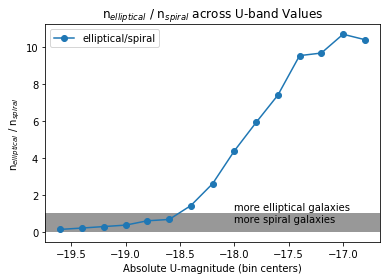

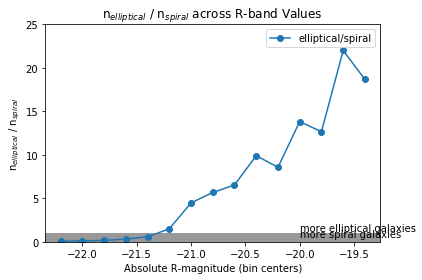

In [38]:
#fraction them
binsu = np.arange(-19.6,-16.5,.2)
binsr = np.arange(-22.2,-19,.2)

line = np.arange(13,26,1)
y = [1,1,1,1,1,1,1,1,1,1,1,1,1]


u_frac = np.histogram(umag_ue,bins=binsu)[0]/np.histogram(umag_us,bins=binsu)[0]
r_frac = np.histogram(rmag_re,bins=binsr)[0]/(np.histogram(rmag_rs,bins=binsr)[0])


from matplotlib import pyplot as plt

plt.plot(binsu[0:len(u_frac)], u_frac ,'o-', label = 'elliptical/spiral')
#plt.plot(line,y,'r')
#plt.xlim(13.5,25)
#plt.ylim(0,15)
plt.xlabel('Absolute U-magnitude (bin centers)')
plt.ylabel('n$_{elliptical}$ / n$_{spiral}$')
plt.title('n$_{elliptical}$ / n$_{spiral}$ across U-band Values')
plt.text(-18, 1.2,'more elliptical galaxies' )
plt.legend()
plt.text(-18, 0.5,'more spiral galaxies' )
for i in range(0, 1):
    plt.axhspan(i, i+1, facecolor='0.2', alpha=0.5)

plt.savefig('u_s_to_e',type='png')
plt.show()


plt.plot(binsr[0:len(r_frac)], r_frac ,'o-', label = 'elliptical/spiral')
#plt.plot(line,y,'r')
#plt.xlim(13.5,19.2)
plt.ylim(0,25)
plt.xlabel('Absolute R-magnitude (bin centers)')
plt.ylabel('n$_{elliptical}$ / n$_{spiral}$')
plt.title('n$_{elliptical}$ / n$_{spiral}$ across R-band Values')

plt.legend()


for i in range(0, 1):
    plt.axhspan(i, i+1, facecolor='0.2', alpha=0.5)
    #plt.axvspan(i, i+.5, facecolor='b', alpha=0.5)

plt.text(-20, 0.5,'more spiral galaxies' )
plt.text(-20, 1.2,'more elliptical galaxies' )
plt.savefig('r_s_to_e',type='png')

plt.show()


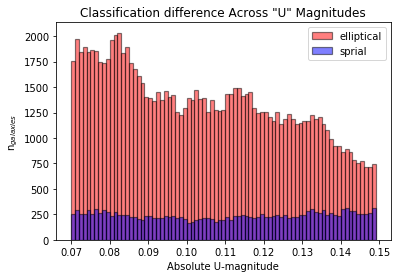

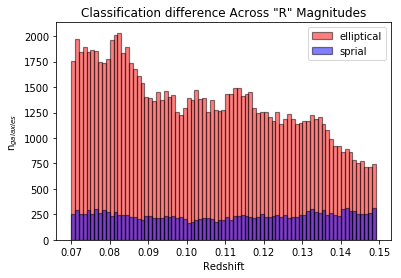

In [41]:
from matplotlib import pyplot as plt
bins = np.arange(0.07,.15,.001)
plt.hist(redshift_ue, bins = bins, label = 'elliptical',edgecolor='black', linewidth=1.2,alpha=0.5, color = 'red')
plt.hist(redshift_us, bins = bins, label = 'sprial',edgecolor='black', linewidth=1.2,alpha=0.5,color = 'blue')
#plt.plot(dist_mean,dV_rms,color = 'r')
plt.xlabel('Absolute U-magnitude')
plt.ylabel('n$_{galaxies}$')
plt.title('Classification difference Across "U" Magnitudes')
plt.legend()
plt.savefig('redshift_u',type='png')
plt.show()


from matplotlib import pyplot as plt
bins = np.arange(0.07,.15,.001)
plt.hist(redshift_re, bins = bins, label = 'elliptical',edgecolor='black', linewidth=1.2,alpha=0.5, color = 'red')
plt.hist(redshift_rs, bins = bins, label = 'sprial',edgecolor='black', linewidth=1.2,alpha=0.5,color = 'blue')
#plt.plot(dist_mean,dV_rms,color = 'r')
plt.xlabel('Redshift')
plt.ylabel('n$_{galaxies}$')
plt.title('Classification difference Across "R" Magnitudes')
plt.legend()
plt.savefig('redshift_r',type='png')
plt.show()